In [37]:
#import tensorflow as tf 
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()
import numpy as np 
import matplotlib.pyplot as plt

In [38]:
tf.__version__


'2.2.0'

In [39]:
x_data = [[0, 0],          
          [0, 1],          
          [1, 0],          
          [1, 1]]
# XOR-gate 
y_data = [[0],          
          [1],          
          [1],          
          [0]]

x_data = np.array(x_data, dtype=np.float32) 
y_data = np.array(y_data, dtype=np.float32)
 

In [40]:
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

안되는 네트워크 구조 예제. 되도록 고쳐봅시다

In [41]:
W = tf.Variable(tf.random_normal([2, 1]), name='weight') 
b = tf.Variable(tf.random_normal([1]), name='bias') 
hypothesis_ori = tf.sigmoid(tf.matmul(X, W) + b)

위의 안되는 네트워크 구조를 수정한 2-2-1 예제

In [42]:
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1') 
b1 = tf.Variable(tf.random_normal([2]), name='bias1') 
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2') 
b2 = tf.Variable(tf.random_normal([1]), name='bias2') 
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)


In [43]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis)) 
#train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost) 
train = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost) 


In [44]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32) 
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))


##GO!

In [45]:
sess = tf.Session()

In [46]:
sess.run(tf.global_variables_initializer())


In [47]:
vcost =[]

In [48]:
for step in range(10001):
  cost1, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})    
  vcost.append(cost1)    
  if step %1000 ==0:        
    print(cost1)


0.7869055
0.04264309
0.011819638
0.0051613185
0.0026474583
0.0014652547
0.0008443211
0.00049771124
0.0002972208
0.00017893525
0.00010823336


Text(0.5, 0, 'epoch')

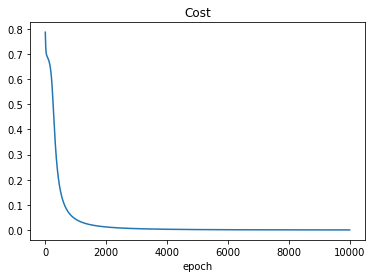

In [49]:
plt.plot(vcost) 
plt.title('Cost') 
plt.xlabel('epoch')

In [50]:
test1 = sess.run(hypothesis, feed_dict={X:[[1,1]]}) 
print(test1[0][0])

9.5786905e-05


In [51]:
for i in range(4):  
  test1 = sess.run(hypothesis, feed_dict={X:[x_data[i]]})  
  print(i, x_data[i], y_data[i] , '---- predicted : ',test1 )


0 [0. 0.] [0.] ---- predicted :  [[0.00010238]]
1 [0. 1.] [1.] ---- predicted :  [[0.9999187]]
2 [1. 0.] [1.] ---- predicted :  [[0.9998468]]
3 [1. 1.] [0.] ---- predicted :  [[9.5786905e-05]]


In [52]:
acc1 = sess.run(accuracy, feed_dict={X: x_data, Y: y_data}) 
print(acc1)


1.0


In [53]:
test1 = sess.run(hypothesis, feed_dict={X:[[0.1,0]]}) 
print(test1[0][0])

0.000108370536
